# Dataset Description: 


The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

# Text Classification
You will need to use the techniques of stopping(removing small insignificant words eg I, the, you etc), stemming(removing the endings of words eg -ed -ing) and use of TF/IDF (Term Frequency over Item Document Frequency) to aid in the classification of the type of news report

This is a task which will require you to do some feature engineering to get decent accuracy

The submission will be the source code which will output a confusion matrix and overall accuracy of each classifier

Running this code at a streatch may take upto 3 Hours 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
 from sklearn.datasets import fetch_20newsgroups
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ftobi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ftobi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ftobi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

FEATURE ENGINEERING !!!

In [35]:
data =fetch_20newsgroups(subset ='all') #(Adding All Subset of catagory)
#data
# here we can see lot of unwanted information on the news data 

Removing the header, footer, quotes in the **dataset**

In [36]:
# Removing the unnecessiary headers , footers, text quotes improves the realiability of the data 
# but still it will reduce the accuracy score.
# our goal is to achieve a descent score of F1
fetch =fetch_20newsgroups(remove= ('headers', 'footers', 'quotes'), subset='all') 
#fetch 

In [37]:
# to print Target Names
#print(list(fetch.target_names))
fetch['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [38]:
# to write as a text file 
f= open('fetch_20newsgroups.txt','w')
f.write(str(fetch))

22804988

In [39]:
print("%d documents" % len(fetch.filenames))
print("%d categories" % len(fetch.target_names))
print()

18846 documents
20 categories



In [40]:
# converting to pandas dataframe
data=pd.Series(fetch.data)
data= pd.DataFrame(data)
data.columns =['data']+data.columns.tolist()[1:] 
data['target']= pd.Series(fetch.target)
data['target_names']=pd.Series(fetch.target_names)
data['filenames']= pd.Series(fetch.filenames)
data['target'][:20]
#data['filenames']

0     10
1      3
2     17
3      3
4      4
5     12
6      4
7     10
8     10
9     19
10    19
11    11
12    19
13    13
14     0
15    17
16    12
17    12
18    11
19     8
Name: target, dtype: int32

In [41]:
data['filenames'][:3]

0    C:\Users\ftobi\scikit_learn_data\20news_home\2...
1    C:\Users\ftobi\scikit_learn_data\20news_home\2...
2    C:\Users\ftobi\scikit_learn_data\20news_home\2...
Name: filenames, dtype: object

In [42]:
data[:5]

,data,target,target_names,filenames
0,\n\nI am sure some bashers of Pens fans are pr...,10,alt.atheism,C:\Users\ftobi\scikit_learn_data\20news_home\2...
1,My brother is in the market for a high-perform...,3,comp.graphics,C:\Users\ftobi\scikit_learn_data\20news_home\2...
2,\n\n\n\n\tFinally you said what you dream abou...,17,comp.os.ms-windows.misc,C:\Users\ftobi\scikit_learn_data\20news_home\2...
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware,C:\Users\ftobi\scikit_learn_data\20news_home\2...
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware,C:\Users\ftobi\scikit_learn_data\20news_home\2...


In [43]:
data.describe()

,target
count,18846.000000
mean,9.293166
std,5.562798
min,0.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,19.000000


In [44]:
data.isnull().sum()

data                0
target              0
target_names    18826
filenames           0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data          18846 non-null  object
 1   target        18846 non-null  int32 
 2   target_names  20 non-null     object
 3   filenames     18846 non-null  object
dtypes: int32(1), object(3)
memory usage: 515.4+ KB


In [46]:
data.target.unique()

array([10,  3, 17,  4, 12, 19, 11, 13,  0,  8,  7,  5,  1, 14, 16,  6,  9,
       18,  2, 15])

In [47]:
x= data['data']
y= data['target']
y[:10]
x[:1]

0    \n\nI am sure some bashers of Pens fans are pr...
Name: data, dtype: object

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=32, shuffle =True )

In [49]:
print("X-Train Shape: ", len(x_train),'\n' "Y-Train Shape :", len(y_train))
print("X-Test Shape: ", len(x_test),'\n' "Y-Test Shape:", len(y_test))

X-Train Shape:  12249 
Y-Train Shape : 12249
X-Test Shape:  6597 
Y-Test Shape: 6597


# Filtering the text data, Tonkenizing, Stemming, Stopwords, Lemmatizer, Tfidf

https://www.kaggle.com/ashishpatel26/beginner-to-intermediate-nlp-tutorial

In [50]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize # Importing Tokenizer from NLTK
from nltk.stem import WordNetLemmatizer,  PorterStemmer # Importing Porter Stemming from NLTK, wordnetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer # Term frequency inverse document frequency

In [51]:
def tokenize(text):
    return word_tokenize(text)

def remove_stop_words(text):
    stop_words=stopwords.words('english')
    return([token.lower() for token in text if token not in stop_words])

def remove_punct(text):
    puncts = "~`!@#€$%^&*()_-+={[}]|\:;'<,>.?/"
    return ([char for char in text if char not in puncts])

def stem_words(text):
    stemmer = WordNetLemmatizer()
    return ([stemmer.lemmatize(token) for token in text])

def stem_words_more(text):
    stemmer = PorterStemmer()
    return ([stemmer.stem(token) for token in text])

def clean_data(input_list):
    return_list = []
    for li in input_list:
        return_list.append((stem_words_more(stem_words(remove_punct(remove_stop_words(tokenize(li))))))) # calling PorterStemmer, WordNetLemmatizer, Punct, Stopwords, Tokenizer from Nltk
    return return_list

def dummy(doc):
    return doc

In [52]:
x_train = clean_data(x_train)
x_test = clean_data(x_test)
print(x_train[:1])
tfidf = TfidfVectorizer(analyzer='word', tokenizer=dummy, preprocessor=dummy, token_pattern=None)
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)
#y_train = y_train[0:2000]
#y_test = y_test[0:200]
print(x_train[:1])

[['i', 'intern', 'modem', 'i', 'configur', 'com4', 'irq', '3', 'i', 'insert', 'card', 'do', '5.02', 'pc', 'show', 'com3', 'irq3', 'com4', "'s", 'address', '2e8', 'when', 'i', 'get', 'debug', 'dump', 'data', '40:0', 'show', 'address', '2e8', 'belong', 'com3', 'even', 'though', 'modem', 'com4', 'now', 'i', 'know', 'modem', 'work', 'correctli', 'sinc', 'i', 'test', 'differ', 'pc', 'show', 'correctli', 'com4', '2e8', 'irq3', 'to', 'make', 'work', 'do', '5.02', 'pc', 'i', 'configur', 'modem', 'com3', '2e8', 'irq3', '--', '-but', 'though', 'i', 'comm', 'program', 'allow', 'fax', 'program', 'came', 'modem', 'work', 'anyway', 'i', 'would', 'like', 'comput', 'display', 'modem', 'set', 'com4', '...', 'i', 'run', 'diagnost', 'program', 'help', 'display', 'modem', 'com4', 'other', 'display', 'com3', 'i', 'use', 'window', 'do', 'problem', '...', 'ani', 'help', 'pointer', 'appreci', '....', 'for', 'variou', 'reason', 'i', 'must', 'modem', 'work', 'com4', 'thu', 'switch', 'com', 'port', 'answer', '..

In [53]:
print(len(x_train.shape))
#print(x_train[:5])

2


# Normalizing the data
https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [54]:
# STANDARD SCALER

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler() 
#scaler.fit(x_train) 
#scaler.fit(x_test)
#x_train = scaler.transform(x_train) 
#x_test = scaler.transform(x_test)  



In [55]:
# MAXABS SCALER

#from sklearn.preprocessing import MaxAbsScaler
#from sklearn.svm import SVC
#scaler = MaxAbsScaler().fit(x_train)

#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

#print(x_train[:1])

Here in this data set, after removing the (Headers, Quotes, Footer, and performing NLP functions) scaling the data reduces the performance of the Model, best is to drop the scaling.

# Modelling

Modelling Using SVM, NAIVE BAYES, NEURAL NETWORKS

https://www.kaggle.com/venkatkrishnan/gensim-text-mining-techniques

# NAIVE BAYES

In [ ]:
# It doesn't require as much training data. It handles both continuous and discrete data. 
# It is highly scalable with the number of predictors and data points. 
# It is fast and can be used to make real-time predictions

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error ,r2_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_auc_score,f1_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [57]:
 #A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [58]:
model = MultinomialNB(alpha=0.005)
model.fit(x_train, y_train)
Nb_y_pred = model.predict(x_test)
pd.DataFrame(classification_report(y_test, Nb_y_pred, output_dict=True)).T
cm = pd.DataFrame(confusion_matrix(y_test, Nb_y_pred))
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,179,0,0,1,0,0,0,5,0,1,0,4,1,4,0,38,8,10,7,14
1,1,231,12,18,8,14,2,8,1,1,2,12,4,2,5,2,1,1,0,0
2,1,26,249,34,7,14,4,18,1,0,0,1,2,2,2,1,0,0,1,0
3,1,10,30,250,22,6,10,10,0,0,1,3,22,0,2,2,0,0,0,1
4,0,17,13,13,243,4,8,13,4,0,1,3,19,3,0,1,2,0,0,0
5,1,30,10,3,1,305,2,2,2,2,1,1,1,1,1,0,1,0,0,0
6,1,5,5,18,15,1,238,23,4,1,2,3,15,1,5,0,0,1,2,1
7,2,2,0,1,2,4,5,266,12,1,0,0,7,0,2,2,5,2,4,0
8,3,5,0,1,0,0,4,24,265,4,2,0,5,4,1,3,9,0,4,0
9,3,2,1,0,0,0,1,15,3,304,16,2,0,4,4,4,2,7,3,0


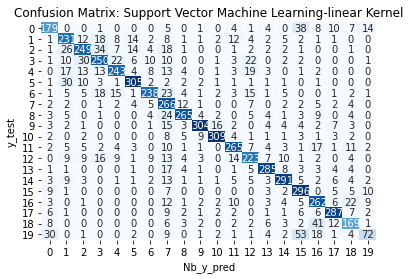

In [59]:
sns.heatmap(cm,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("Nb_y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix: Support Vector Machine Learning-linear Kernel")
plt.show()

In [60]:
pd.DataFrame(classification_report(y_test, Nb_y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.699219,0.658088,0.678030,272.000000
1,0.652542,0.710769,0.680412,325.000000
2,0.730205,0.685950,0.707386,363.000000
3,0.700280,0.675676,0.687758,370.000000
4,0.778846,0.706395,0.740854,344.000000
5,0.856742,0.837912,0.847222,364.000000
6,0.835088,0.697947,0.760383,341.000000
7,0.545082,0.839117,0.660870,317.000000
8,0.846645,0.793413,0.819165,334.000000
9,0.907463,0.819407,0.861190,371.000000


In [61]:
print("Accuracy Score", accuracy_score(y_test, Nb_y_pred))
print("Model Score: ", model.score(x_test, y_test))

Accuracy Score 0.7562528422010004
Model Score:  0.7562528422010004


# SVM

In [ ]:
#SVM

#Strengths: 

#SVM's can model non-linear decision boundaries, and there are many kernels to choose from. 
#They are also fairly robust against overfitting, especially in high-dimensional space.
# in our task the rbf kernel performance are better compared with linear kernel, when gama is 0.1 

#Weaknesses: 

#However, SVM's are memory intensive, trickier to tune due to the importance of picking the right kernel as well as gamma value outperforms when increased, 
#and don't scale well to larger datasets. Currently in the industry, random forests are usually preferred over SVM's.
# 

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.svm import SVR,SVC
from sklearn.model_selection import cross_val_score

Finding best suitable kernel for SVM

In [63]:
kernel = ['rbf','linear','poly','sigmoid']   
acc_score_list = []
for x in kernel:
    best_kernel = svm.SVC(kernel=x)
    best_kernel.fit(x_train, y_train)
    Best_kernel_pred = best_kernel.predict(x_test)
    acc_score_list.append(f1_score(y_test, Best_kernel_pred, average='weighted')) 
    
print(kernel, acc_score_list)

['rbf', 'linear', 'poly', 'sigmoid'] [0.714448945168928, 0.7174551274540523, 0.6128687447583786, 0.7052607204189272]


From above we can tell Rbf and Linear Kernel are better performing

In [64]:
#   SVM -rbf Kernel 

# WARNING !!!  Computation speed:  1.5 Hours for Colab under TPU- 1.5 GB RAM (Normal CPU-> WILL CRASH, 2080 WILL TAKE 45 Mins)

svr = SVR(C=10, kernel='rbf', gamma=1)
cv = cross_val_score(svr, x_train, y_train, cv=10)
print('Scores ', cv )
print("Mean",cv.mean())
print("STD", cv.std())
model_svr = svr.fit(x_train, y_train)
score = model.score(x_test, y_test)
print("Model Score :", score)

Scores  [0.54867683 0.54390456 0.52445699 0.54456876 0.49197902 0.5200268
 0.54342449 0.5143823  0.53005634 0.56455645]
Mean 0.5326032545780606
STD 0.019699505720311684
Model Score : 0.5500512389552186


In [ ]:
svr_y_pred = model_svr.predict(x_test)

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, svr_y_pred))
cm
sns.heatmap(cm,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("svr_y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix: Support Vector Machine Learning-linear Kernel")
plt.show()

In [ ]:
pd.DataFrame(classification_report(y_test, svr_y_pred), output_dict=True)).T

In [ ]:
#print(classification_report(y_test, svr_y_pred))
print("Accuracy Score", accuracy_score(y_test, svr_y_pred))

# Neural Network

https://www.kaggle.com/androbomb/simple-nn-with-python-multi-layer-perceptron

In [67]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences

In [68]:
#y_train[:10]

In [69]:
#model = Sequential()
#model.add(Dense(128, input_dim=2, activation='relu'))
#model.add(Dense(64, activation='tanh'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(1))

#model.summary()
##order_train  = tf.sparse.reorder(x_train, y_train)
##order_test= tf.sparse.reorder(x_test, y_test)


#x1_train= (tf.sparse.reorder(x_train))
#x1_test= tf.sparse.reorder(x_test)
#y1_train= tf.sparse.reorder(y_train)
#y1_teset=tf.sparse.reorder(y1_test)

#x1_train = tf.sparse_placeholder(tf.float64)

#model.compile(loss='mean_squared_error', optimizer="adam", metrics=['mean_squared_error'])
#model.fit(x1_train,y1_train, epochs=100)

#y_pred = model.predict(x1_test)
#print("MSE: ",np.sqrt(mean_squared_error(y1_test,y_pred)))
#print("R2",r2_score(y1_test, y_pred))
#print("Accuracy: ",accuracy_score(y1_test, y_pred))

# error of INPUT MUST BE A SPARSE TENSOR

# TRIED TO MODIFY THE INPUT BY REORDERING THE INPUT SPARSE 

**MULTI LAYER PERCEPTRON CLASSIFIER** -MLP

In [70]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(x_train, y_train)
MLP_y_pred = classifier.predict(x_test)

In [ ]:
#Importing Confusion Matrix
#Comparing the predictions against the actual observations 
cm1 = confusion_matrix(y_test, MLP_y_pred)
cm1
#Printing the accuracy
print ("Accuracy of MLPClassifier :",accuracy_score(y_test, MLP_y_pred))
print("Model Score: ", model_score(x_test, y_test))
print("R-Square value ",r2_score(y_test, MLP_y_pred))
print("Classification Report: ", classification_report(y_test, MLP_y_pred) )

In [ ]:
sns.heatmap(cm1,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("MLP_y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix: Support Vector Machine Learning-linear Kernel")
plt.show()

 Linear_Model Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
nn = Perceptron()
nn.fit(x_train, y_train)
per_y_pred = nn.predict(x_test)
print(classification_report(y_test, per_y_pred))

In [ ]:
cm1 = confusion_matrix(y_test, per_y_pred)
cm1
sns.heatmap(cm1,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("per_y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix: Support Vector Machine Learning-linear Kernel")
plt.show()

In [ ]:
print("Accuracy Score", accuracy_score(y_test, per_y_pred))

# Conclusion :


In [ ]:
final = pd.DataFrame({'MODELS': ["NAIVE BAYES","SVM","MLP","PERCEPTRON"],
'ACCURACY': [accuracy_score(y_test,Nb_y_pred),accuracy_score(y_test,svr_y_pred),accuracy_score(y_test, MLP_y_pred), accuracy_score(y_test, per_y_pred) ],
 'REASONS' :[ "SVM linear kernal achieves the highest performance","Neural network", "Keras -Sequential Model with Adam optimizer","to be"]})
final

In [ ]:

# Best Model is the Naive Bayes 